In [1]:
# Importing standard Qiskit libraries
from qiskit import IBMQ
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.quantum_info import Operator
from qiskit.visualization.array import array_to_latex
from IPython.display import display
%matplotlib inline

In [2]:
import numpy as np
import numpy.random
import math
from functools import reduce
np.set_printoptions(precision=2, suppress=True)

In [3]:
backend = Aer.get_backend('statevector_simulator')

In [4]:
def chain(num): # function for arbitrary sized chain of qubits
    
    circ = QuantumCircuit(num, num)
    
    for i in range(num):
        for j in range(i + 1, num):
            circ.cx(i, j)
    
    circ.barrier(range(num))
    
    backend = Aer.get_backend('unitary_simulator')
    job = execute(circ, backend)
    result = job.result()
    unitary = np.array(result.get_unitary(circ, decimals=3))
    
    circ.measure(range(num), range(num))
    
    return circ, unitary

In [5]:
backend_sim = Aer.get_backend('qasm_simulator')

In [6]:
qc5, U5 = chain(5) # function used for size of 5

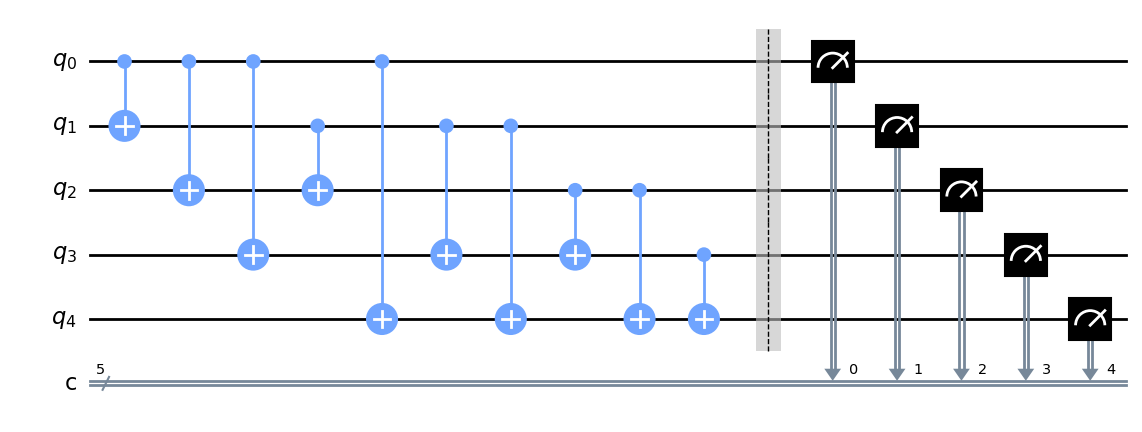

In [7]:
qc5.draw('mpl') 

In [8]:
qc10, U10 = chain(10) # function used for size of 10 and storing the unitary matrix
print(U10) # print unitary matrix for 10 qubit system from .get_unitary in 'def chain(num)'

[[1.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 1.+0.j 0.+0.j]
 ...
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]]


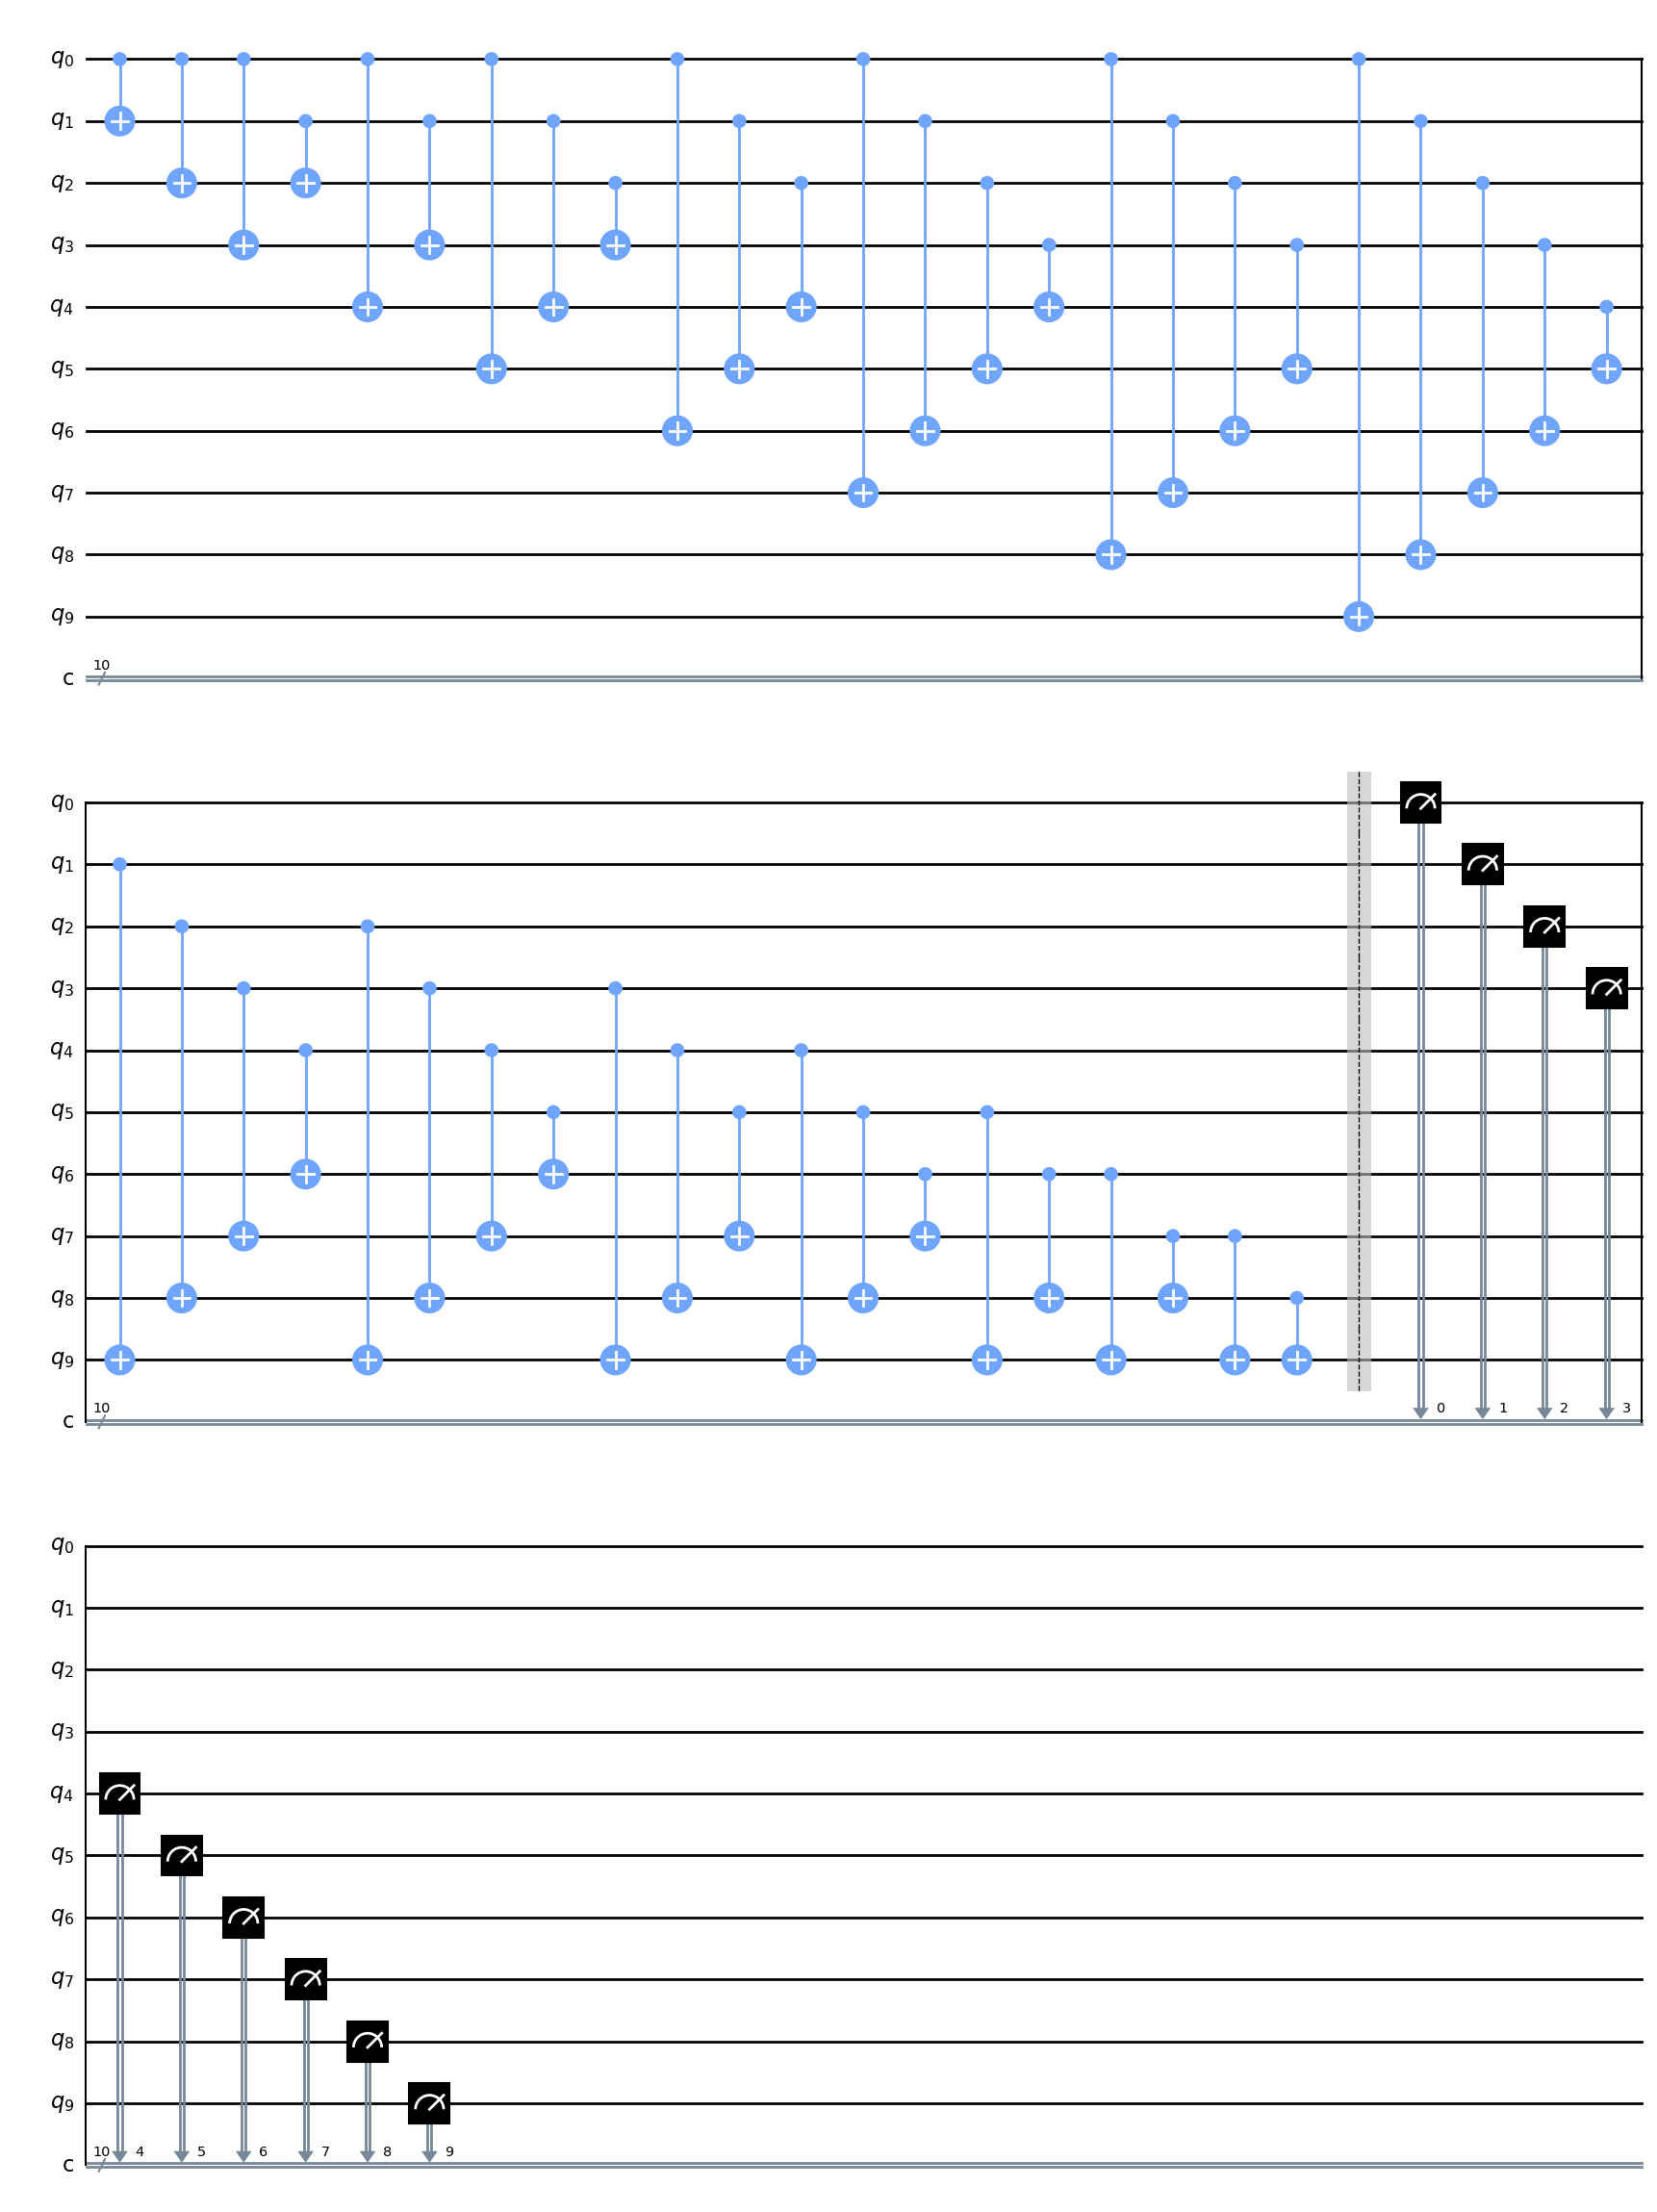

In [9]:
qc10.draw('mpl')

In [10]:
def Ndot(*args): # function for computing dot products over amount of input arguments

  result = args[0]
    
  for i in range(1, len(args)):
     result = np.dot(result, args[i])
        
  return result

In [11]:
def bin_combos(bits): # function for creating all bit combinations given number of bits

    # Create an empty list to store the binary combinations
    combinations = []

    # Loop through all possible binary combinations
    for i in range(2**bits):
        binary = bin(i)[2:].zfill(bits)
        combinations.append(tuple(int(bit) for bit in binary))

    combinations = np.array(combinations)

    #print(combinations)
    
    return combinations

In [12]:
def binary_to_decimal(binary_array): # function for converting all binary combinations to decimal values

    # Convert each binary number to decimal
    decimal_array = np.zeros(len(binary_array), dtype=int)
    for i in range(len(binary_array)):
        binary_string = ''.join(map(str, binary_array[i]))
        decimal_array[i] = int(binary_string, 2)

    return decimal_array

In [13]:
def flip(combinations, control, target): # function for flipping target bit based on the control bit

    # Create an empty array to store the flipped combinations
    flipped_combinations = np.empty_like(combinations)

    # Loop through all the combinations
    for i in range(len(combinations)):
        # Check if the other bit is equal to 1
        if combinations[i, control] == 1:
            # Flip the specified bit
            flipped_combinations[i] = np.copy(combinations[i])
            flipped_combinations[i, target] = 1 - flipped_combinations[i, target]
        else:
            # Do not flip the specified bit
            flipped_combinations[i] = np.copy(combinations[i])

    # Return the flipped combinations
    return flipped_combinations

In [14]:
def index_to_matrix(control_row, control_col, shape): # function for using decimal vales in two arrays to set an index in a 
                                                      # zeros array to one
    # Create a zeros matrix with the specified shape
    matrix = np.zeros(shape, dtype=int)

    # Set the values at the specified indices to 1
    matrix[control_row, control_col] = 1

    return matrix

In [15]:
"""
Three Qubit System

"""

ThreeBits = bin_combos(3)

q0q1 = flip(ThreeBits, 2, 1)
q0q2 = flip(ThreeBits, 2, 0)

q1q2 = flip(ThreeBits, 1, 0)

ThreeBitsDecimal = binary_to_decimal(ThreeBits)

q0q1Decimal = binary_to_decimal(q0q1)
q0q2Decimal = binary_to_decimal(q0q2)
q1q2Decimal = binary_to_decimal(q1q2)

S1 = index_to_matrix(ThreeBitsDecimal, q0q1Decimal, (8, 8))
S2 = index_to_matrix(ThreeBitsDecimal, q0q2Decimal, (8, 8))
S3 = index_to_matrix(ThreeBitsDecimal, q1q2Decimal, (8, 8))

U3 = Ndot(S3, S2, S1)

latex = array_to_latex(U3, max_size=U3.shape)
print('\n U = \n')
display(latex)
print('\n')


 U = 



<IPython.core.display.Latex object>

In [16]:
"""
Five Qubit System

"""

FiveBits = bin_combos(5) # all binary combinations

q0q1 = flip(FiveBits, 4, 3) 
q0q2 = flip(FiveBits, 4, 2)
q0q3 = flip(FiveBits, 4, 1)
q0q4 = flip(FiveBits, 4, 0)

q1q2 = flip(FiveBits, 3, 2)
q1q3 = flip(FiveBits, 3, 1)
q1q4 = flip(FiveBits, 3, 0)

q2q3 = flip(FiveBits, 2, 1)
q2q4 = flip(FiveBits, 2, 0)

q3q4 = flip(FiveBits, 1, 0)

FiveBitsDecimal = binary_to_decimal(FiveBits)

q0q1Decimal = binary_to_decimal(q0q1)
q0q2Decimal = binary_to_decimal(q0q2)
q0q3Decimal = binary_to_decimal(q0q3)
q0q4Decimal = binary_to_decimal(q0q4)
q1q2Decimal = binary_to_decimal(q1q2)
q1q3Decimal = binary_to_decimal(q1q3)
q1q4Decimal = binary_to_decimal(q1q4)
q2q3Decimal = binary_to_decimal(q2q3)
q2q4Decimal = binary_to_decimal(q2q4)
q3q4Decimal = binary_to_decimal(q3q4)

S1 = index_to_matrix(FiveBitsDecimal, q0q1Decimal, (32, 32)) # Create all stages
S2 = index_to_matrix(FiveBitsDecimal, q0q2Decimal, (32, 32))
S3 = index_to_matrix(FiveBitsDecimal, q0q3Decimal, (32, 32))
S4 = index_to_matrix(FiveBitsDecimal, q0q4Decimal, (32, 32))
S5 = index_to_matrix(FiveBitsDecimal, q1q2Decimal, (32, 32))
S6 = index_to_matrix(FiveBitsDecimal, q1q3Decimal, (32, 32))
S7 = index_to_matrix(FiveBitsDecimal, q1q4Decimal, (32, 32))
S8 = index_to_matrix(FiveBitsDecimal, q2q3Decimal, (32, 32))
S9 = index_to_matrix(FiveBitsDecimal, q2q4Decimal, (32, 32))
S10 = index_to_matrix(FiveBitsDecimal, q3q4Decimal, (32, 32))

U5_lin = Ndot(S10, S9, S8, S7, S6, S5, S4, S3, S2, S1)

if np.array_equal(U5, U5_lin):
    print("The simulation of a five qubit system has a unitary matrix matching the unitary matrix found through linear algebra computations")
else:
    print("The simulation of a five qubit system has a unitary matrix not matching the unitary matrix found through linear algebra computations")

latex = array_to_latex(U5_lin, max_size=U5_lin.shape)
print('\n U = \n')
display(latex)
print('\n')

The simulation of a five qubit system has a unitary matrix matching the unitary matrix found through linear algebra computations

 U = 



<IPython.core.display.Latex object>